# Exploratory Data Analysis on Insurance Dataset and Using ML Algorithms to predict insurance prediction

#### Contributed by:
* Suddhasil Chatterjee (github: https://github.com/SuddhasilC)

## Exploratory data analysis

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading the dataset

In [2]:
data=pd.read_csv('data/insurance.csv')

### Exploring the data


In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### Observations:
* We have no null values in the dataset
* Age varies from a minimum of 18 to a maximum of 64

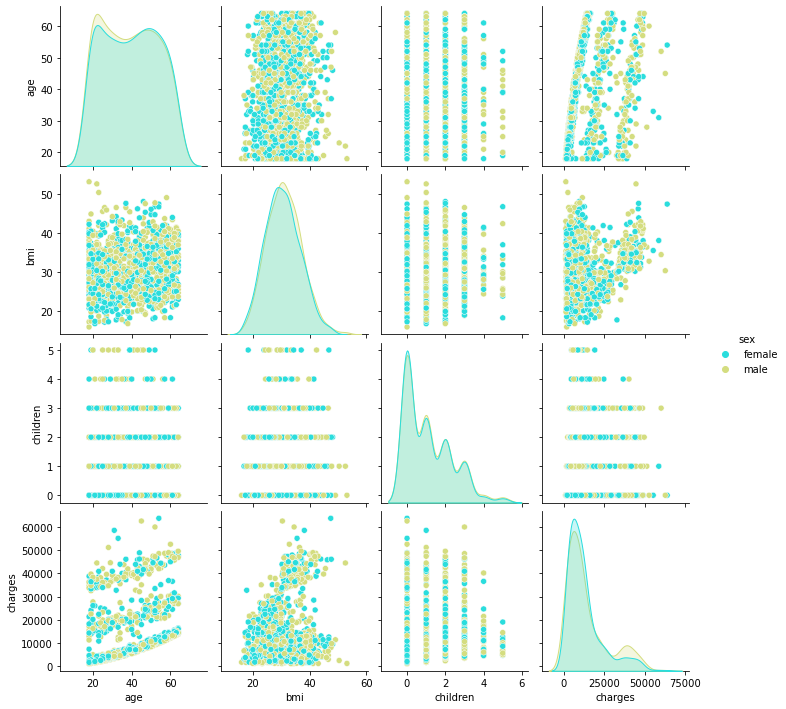

In [7]:
sns.pairplot(data,hue="sex",palette='rainbow')

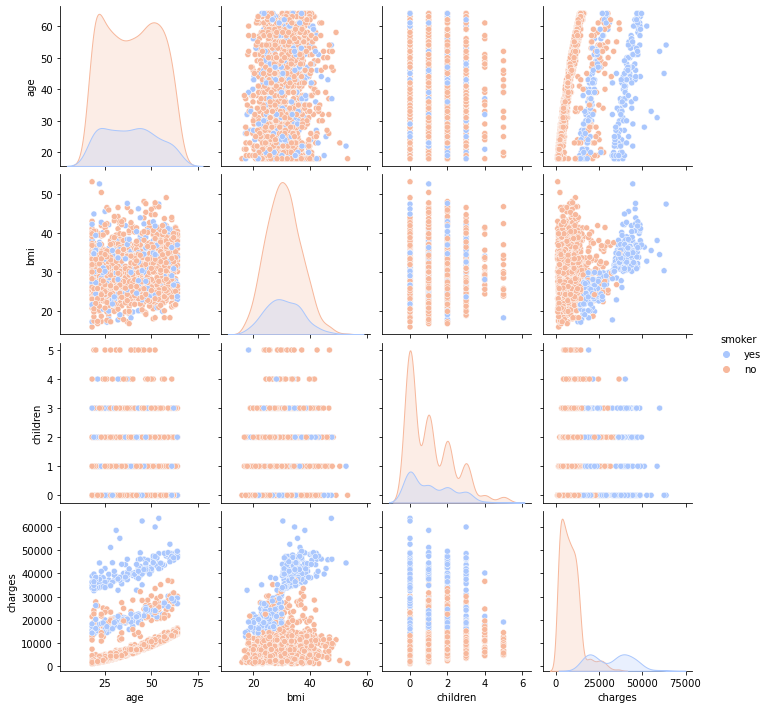

In [8]:
sns.pairplot(data,hue='smoker',palette="coolwarm")

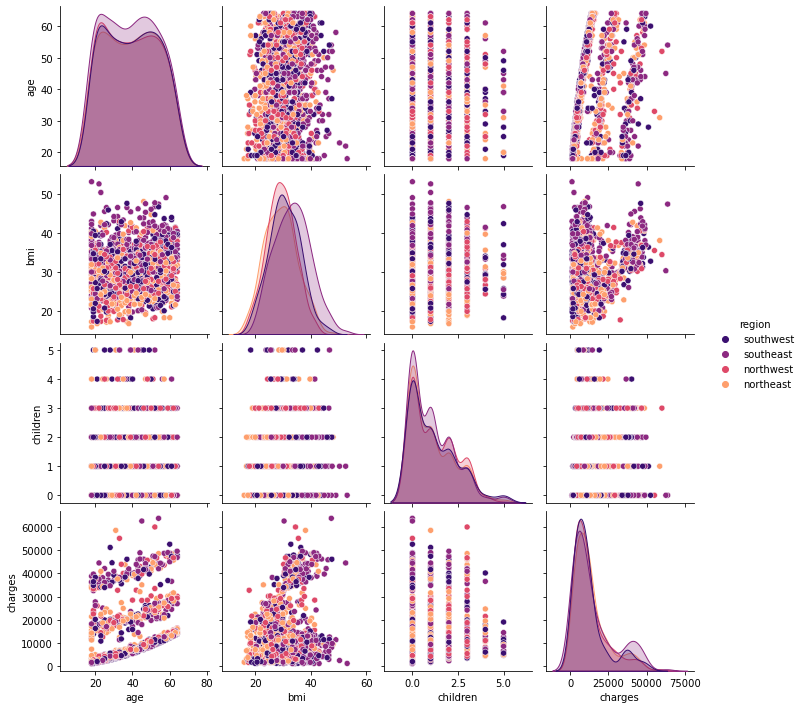

In [9]:
sns.pairplot(data,hue='region',palette='magma')

<AxesSubplot:>

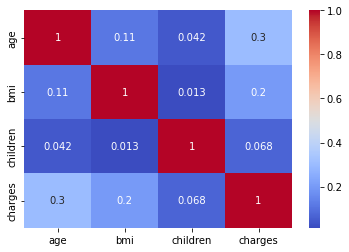

In [10]:
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

#### Observations:
* Older people has to pay more charges than younger ones
* Higher BMI persons has to pay more than lower ones
* Having high number of childern means can only spend less expenses on insurance
* Expenses doesnot varies much with respect to 'sex'
* Smoker has to pay more than Non-Smoker
* Expenses doesnot varies much with respect to 'region'

## Data Preprocessing

#### Sex, smoker and region are three non numeric columns. We apply one hot encoding to convert them to numeric columns.

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [12]:
feature=['sex','smoker','region']
for feat in feature:
    enc = OneHotEncoder(sparse=False)
    color_onehot = enc.fit_transform(data[[feat]])
    x=pd.DataFrame(color_onehot, columns=list(enc.categories_[0]))
    for i in x.columns:
        data[i]=x[i]
    del data[feat]

### Spliting dataset into training and test data

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data.drop(['charges'],axis=1),data['charges'],random_state=42,shuffle=True,test_size=0.15)

## Predicting insurance prediction using ML Algorithms

### Importing the libraries

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [15]:
accuracy=[]
mod=['Linear Regression','Polynomial Regression','Decision Tree Regression','Random Forest Regression','XGBoost','Gradient Boosting Regressor']

### Linear Regression

In [16]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = regressor.predict(X_test)

In [18]:
print('MSE of Linear Regression : ' + str(round(mean_squared_error(y_test,y_pred),2)))
print('r2 score of Linear Regression : ' + str(round(r2_score(y_test,y_pred),2)))

MSE of Linear Regression : 30833038.62
r2 score of Linear Regression : 0.8


In [19]:
accuracy.append(round(r2_score(y_test,y_pred),2))

### Polynomial Regression

In [20]:
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression()

In [21]:
y_pred=lin_reg_2.predict(poly_reg.fit_transform(X_test))

In [22]:
print('MSE of Linear Regression : ' + str(round(mean_squared_error(y_test,y_pred),2)))
print('r2 score of Linear Regression : ' + str(round(r2_score(y_test,y_pred),2)))

MSE of Linear Regression : 40561589.47
r2 score of Linear Regression : 0.73


In [23]:
accuracy.append(round(r2_score(y_test,y_pred),2))

### Decision Tree Regressor

In [24]:
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [25]:
y_pred=regressor.predict(X_test)

In [26]:
print('MSE of Linear Regression : ' + str(round(mean_squared_error(y_test,y_pred),2)))
print('r2 score of Linear Regression : ' + str(round(r2_score(y_test,y_pred),2)))

MSE of Linear Regression : 42239274.39
r2 score of Linear Regression : 0.72


In [27]:
accuracy.append(round(r2_score(y_test,y_pred),2))

### Random Forest Regressor

In [28]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [29]:
y_pred=regressor.predict(X_test)

In [30]:
print('MSE of Linear Regression : ' + str(round(mean_squared_error(y_test,y_pred),2)))
print('r2 score of Linear Regression : ' + str(round(r2_score(y_test,y_pred),2)))

MSE of Linear Regression : 24134074.13
r2 score of Linear Regression : 0.84


In [31]:
accuracy.append(round(r2_score(y_test,y_pred),2))

### XGBoost Regression

In [32]:
xgb = XGBRegressor()
xgb_model = xgb.fit(X_train,y_train)

In [33]:
y_pred=xgb.predict(X_test)

In [34]:
print('MSE of Linear Regression : ' + str(round(mean_squared_error(y_test,y_pred),2)))
print('r2 score of Linear Regression : ' + str(round(r2_score(y_test,y_pred),2)))

MSE of Linear Regression : 27414863.1
r2 score of Linear Regression : 0.82


In [35]:
accuracy.append(round(r2_score(y_test,y_pred),2))

### Gradient Boosting Regressor

In [36]:
gb = GradientBoostingRegressor()
gb_model = gb.fit(X_train,y_train)

In [37]:
y_pred=gb.predict(X_test)

In [38]:
print('MSE of Linear Regression : ' + str(round(mean_squared_error(y_test,y_pred),2)))
print('r2 score of Linear Regression : ' + str(round(r2_score(y_test,y_pred),2)))

MSE of Linear Regression : 19142219.94
r2 score of Linear Regression : 0.87


In [39]:
accuracy.append(round(r2_score(y_test,y_pred),2))

### Summary

<AxesSubplot:>

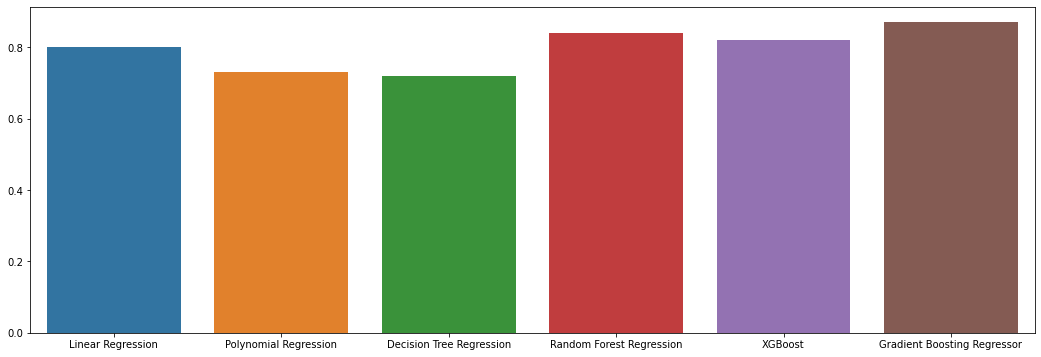

In [40]:
plt.figure(figsize=(18,6))
sns.barplot(x=mod,y=accuracy)

### Conclusion: Best results were observed using Gradient Boosting Regressor